In [70]:
import warnings
import numpy as np
import pandas as pd
import json
import requests
import seaborn as sns
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
%matplotlib inline

In [71]:
data=pd.read_csv('rideshare_kaggle.csv')
data.head()

,id,timestamp,hour,day,month,datetime,timezone,source,destination,cab_type,...,precipIntensityMax,uvIndexTime,temperatureMin,temperatureMinTime,temperatureMax,temperatureMaxTime,apparentTemperatureMin,apparentTemperatureMinTime,apparentTemperatureMax,apparentTemperatureMaxTime
0,424553bb-7174-41ea-aeb4-fe06d4f4b9d7,1.544953e+09,9,16,12,2018-12-16 09:30:07,America/New_York,Haymarket Square,North Station,Lyft,...,0.1276,1544979600,39.89,1545012000,43.68,1544968800,33.73,1545012000,38.07,1544958000
1,4bd23055-6827-41c6-b23b-3c491f24e74d,1.543284e+09,2,27,11,2018-11-27 02:00:23,America/New_York,Haymarket Square,North Station,Lyft,...,0.1300,1543251600,40.49,1543233600,47.30,1543251600,36.20,1543291200,43.92,1543251600
2,981a3613-77af-4620-a42a-0c0866077d1e,1.543367e+09,1,28,11,2018-11-28 01:00:22,America/New_York,Haymarket Square,North Station,Lyft,...,0.1064,1543338000,35.36,1543377600,47.55,1543320000,31.04,1543377600,44.12,1543320000
3,c2d88af2-d278-4bfd-a8d0-29ca77cc5512,1.543554e+09,4,30,11,2018-11-30 04:53:02,America/New_York,Haymarket Square,North Station,Lyft,...,0.0000,1543507200,34.67,1543550400,45.03,1543510800,30.30,1543550400,38.53,1543510800
4,e0126e1f-8ca9-4f2e-82b3-50505a09db9a,1.543463e+09,3,29,11,2018-11-29 03:49:20,America/New_York,Haymarket Square,North Station,Lyft,...,0.0001,1543420800,33.10,1543402800,42.18,1543420800,29.11,1543392000,35.75,1543420800


In [72]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 693071 entries, 0 to 693070
Data columns (total 57 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   id                           693071 non-null  object 
 1   timestamp                    693071 non-null  float64
 2   hour                         693071 non-null  int64  
 3   day                          693071 non-null  int64  
 4   month                        693071 non-null  int64  
 5   datetime                     693071 non-null  object 
 6   timezone                     693071 non-null  object 
 7   source                       693071 non-null  object 
 8   destination                  693071 non-null  object 
 9   cab_type                     693071 non-null  object 
 10  product_id                   693071 non-null  object 
 11  name                         693071 non-null  object 
 12  price                        637976 non-null  float64
 13 

In [73]:
data.isna().sum()

id                                 0
timestamp                          0
hour                               0
day                                0
month                              0
datetime                           0
timezone                           0
source                             0
destination                        0
cab_type                           0
product_id                         0
name                               0
price                          55095
distance                           0
surge_multiplier                   0
latitude                           0
longitude                          0
temperature                        0
apparentTemperature                0
short_summary                      0
long_summary                       0
precipIntensity                    0
precipProbability                  0
humidity                           0
windSpeed                          0
windGust                           0
windGustTime                       0
v

In [74]:
data.shape

(693071, 57)

In [75]:
data_null=data.loc[data['price'].isna()]
null_ind=data_null.index

In [7]:
df=data.drop(index=null_ind,axis=0)

In [8]:
df.shape

(637976, 57)

In [9]:
df=df.drop(columns=['id','name','product_id','short_summary','long_summary','temperature','apparentTemperature'],axis=1)

cat_col=[feature for feature in df.columns if df[feature].dtype=='O']
print(f'Categorical column: {cat_col}')
num_col=[feature for feature in df.columns if df[feature].dtype!='O']
print(f'Numerical column: {num_col}')

In [10]:
year=[]
for i in df['datetime']:
    ss=i.split('-')
    year.append(ss[0])
df['datetime']=year
df['datetime'].value_counts()
    

2018    637976
Name: datetime, dtype: int64

In [11]:
data=df.drop(columns=['datetime','source','destination','timezone'],axis=1)

In [12]:
df['cab_type'].value_counts()

Uber    330568
Lyft    307408
Name: cab_type, dtype: int64

In [13]:
df['icon'].value_counts()

 cloudy                  201429
 partly-cloudy-night     145492
 partly-cloudy-day       106337
 rain                     96170
 clear-night              55577
 clear-day                24679
 fog                       8292
Name: icon, dtype: int64

In [14]:
cat_col=[feature for feature in data.columns if data[feature].dtype=='O']
print(f'Categorical column: {cat_col}')

num_col=[feature for feature in data.columns if data[feature].dtype!='O']
print(f'Numerical column: {num_col}')

Categorical column: ['cab_type', 'icon']
Numerical column: ['timestamp', 'hour', 'day', 'month', 'price', 'distance', 'surge_multiplier', 'latitude', 'longitude', 'precipIntensity', 'precipProbability', 'humidity', 'windSpeed', 'windGust', 'windGustTime', 'visibility', 'temperatureHigh', 'temperatureHighTime', 'temperatureLow', 'temperatureLowTime', 'apparentTemperatureHigh', 'apparentTemperatureHighTime', 'apparentTemperatureLow', 'apparentTemperatureLowTime', 'dewPoint', 'pressure', 'windBearing', 'cloudCover', 'uvIndex', 'visibility.1', 'ozone', 'sunriseTime', 'sunsetTime', 'moonPhase', 'precipIntensityMax', 'uvIndexTime', 'temperatureMin', 'temperatureMinTime', 'temperatureMax', 'temperatureMaxTime', 'apparentTemperatureMin', 'apparentTemperatureMinTime', 'apparentTemperatureMax', 'apparentTemperatureMaxTime']


<AxesSubplot:>

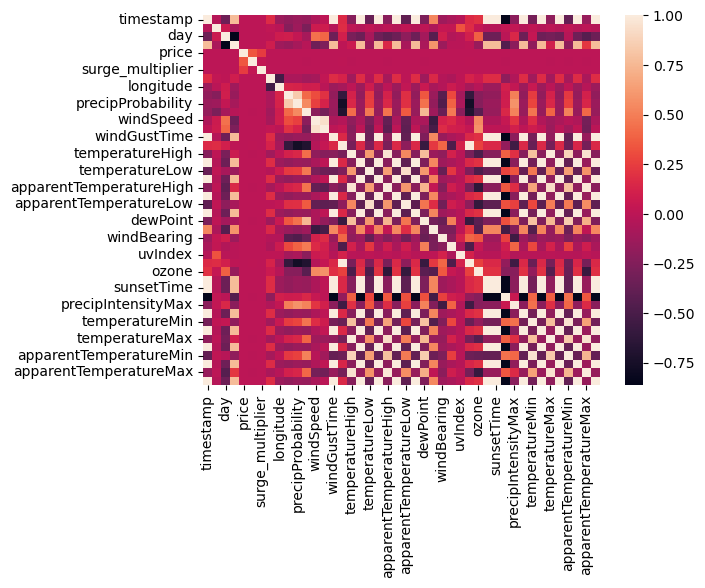

In [15]:
sns.heatmap(data[num_col].corr())

In [16]:
data[num_col].corr()

,timestamp,hour,day,month,price,distance,surge_multiplier,latitude,longitude,precipIntensity,...,precipIntensityMax,uvIndexTime,temperatureMin,temperatureMinTime,temperatureMax,temperatureMaxTime,apparentTemperatureMin,apparentTemperatureMinTime,apparentTemperatureMax,apparentTemperatureMaxTime
timestamp,1.000000,-0.028501,-0.341420,0.771245,0.000808,0.003290,0.000611,0.168295,-0.136716,-0.179834,...,-0.211887,0.999364,-0.307194,0.998195,-0.186495,0.999290,-0.378538,0.998288,-0.157891,0.999276
hour,-0.028501,1.000000,0.066223,-0.079734,0.000561,0.002283,-0.000067,0.019228,-0.005986,-0.233246,...,0.020288,-0.027997,0.015668,-0.027486,0.002982,-0.028479,0.015882,-0.028172,0.002904,-0.028273
day,-0.341420,0.066223,1.000000,-0.861325,-0.000722,-0.000992,0.001397,0.006744,0.078539,0.091513,...,0.145789,-0.341330,0.038089,-0.334118,-0.304704,-0.344669,-0.019878,-0.335176,-0.444366,-0.344546
month,0.771245,-0.079734,-0.861325,1.000000,0.000913,0.002402,-0.000612,0.085946,-0.126763,-0.154356,...,-0.213301,0.770832,-0.191928,0.765319,0.105113,0.773057,-0.191293,0.766097,0.214928,0.772962
price,0.000808,0.000561,-0.000722,0.000913,1.000000,0.345061,0.240458,0.002088,-0.001417,0.000166,...,0.001114,0.000763,-0.000428,0.000769,-0.000550,0.000766,-0.000580,0.000814,-0.000290,0.000746
distance,0.003290,0.002283,-0.000992,0.002402,0.345061,1.000000,0.025946,0.000984,-0.000415,-0.000512,...,0.000670,0.003298,-0.003192,0.003166,-0.003875,0.003318,-0.003649,0.003266,-0.003889,0.003319
surge_multiplier,0.000611,-0.000067,0.001397,-0.000612,0.240458,0.025946,1.000000,0.001471,-0.001961,-0.001522,...,-0.000090,0.000585,-0.000716,0.000594,-0.001998,0.000563,-0.001317,0.000502,-0.002214,0.000559
latitude,0.168295,0.019228,0.006744,0.085946,0.002088,0.000984,0.001471,1.000000,-0.531443,-0.074306,...,-0.047307,0.171976,-0.114437,0.169740,-0.109271,0.175336,-0.096327,0.171069,-0.082894,0.173359
longitude,-0.136716,-0.005986,0.078539,-0.126763,-0.001417,-0.000415,-0.001961,-0.531443,1.000000,0.130794,...,0.030330,-0.136620,0.048836,-0.140275,-0.007029,-0.136949,0.010131,-0.140399,-0.022605,-0.135525
precipIntensity,-0.179834,-0.233246,0.091513,-0.154356,0.000166,-0.000512,-0.001522,-0.074306,0.130794,1.000000,...,0.498344,-0.180105,0.236618,-0.182130,0.114034,-0.181972,0.224728,-0.170320,0.108917,-0.182989


In [76]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, MinMaxScaler, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score, adjusted_rand_score

In [18]:
le=LabelEncoder()
le_class=le.fit_transform(df['source'])
n_clusters = len(le.classes_)

In [19]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
data_rescaled = scaler.fit_transform(data[num_col])

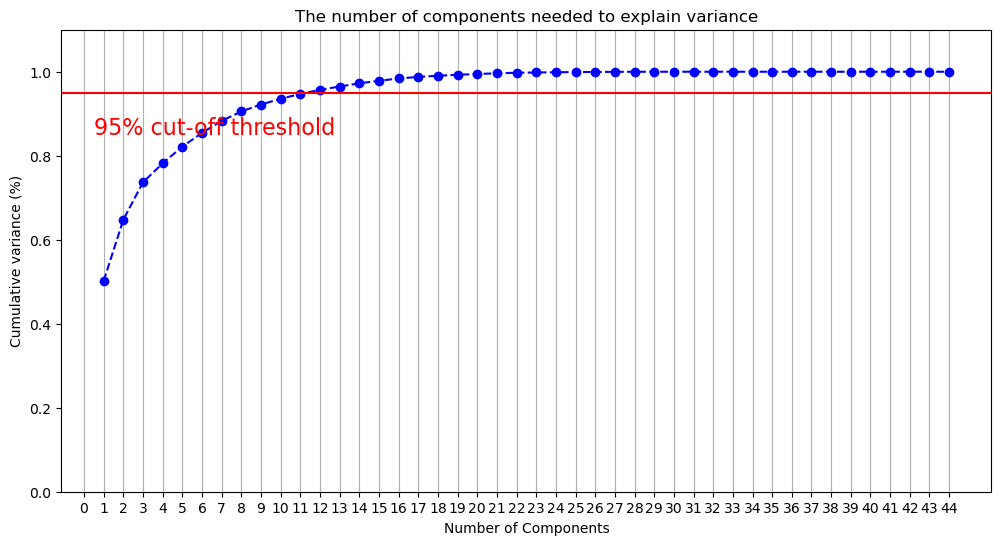

In [20]:
pca = PCA().fit(data_rescaled)
plt.rcParams["figure.figsize"] = (12,6)

fig, ax = plt.subplots()
xi = np.arange(1, 45, step=1)
y = np.cumsum(pca.explained_variance_ratio_)

plt.ylim(0.0,1.1)
plt.plot(xi, y, marker='o', linestyle='--', color='b')

plt.xlabel('Number of Components')
plt.xticks(np.arange(0, 45, step=1)) #change from 0-based array index to 1-based human-readable label
plt.ylabel('Cumulative variance (%)')
plt.title('The number of components needed to explain variance')

plt.axhline(y=0.95, color='r', linestyle='-')
plt.text(0.5, 0.85, '95% cut-off threshold', color = 'red', fontsize=16)

ax.grid(axis='x')
plt.show()

Here I need 10 Pca principal components on 95% variance

In [21]:
num_pipeline=Pipeline(steps=[('scaling',MinMaxScaler()),
                            ('PCA',PCA(n_components=11, random_state=32))])
cat_pipeline=Pipeline(steps=[('encoder',OneHotEncoder())])

In [22]:
preprocessor=ColumnTransformer([('numerical_pipeline',num_pipeline,num_col),
                                ('categorical_pipeline',cat_pipeline,cat_col)])


In [23]:
clusterer=Pipeline(steps=[("kmeans",KMeans(n_clusters=n_clusters,init="k-means++", n_init=50,max_iter=500,
                                           random_state=32))])

In [24]:
pipe=Pipeline(steps=[("preprocessor",preprocessor),
                    ("clusterer",clusterer)])

In [25]:
pipe.fit(data)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('numerical_pipeline',
                                                  Pipeline(steps=[('scaling',
                                                                   MinMaxScaler()),
                                                                  ('PCA',
                                                                   PCA(n_components=11,
                                                                       random_state=32))]),
                                                  ['timestamp', 'hour', 'day',
                                                   'month', 'price', 'distance',
                                                   'surge_multiplier',
                                                   'latitude', 'longitude',
                                                   'precipIntensity',
                                                   'precipProbability',
                              

In [26]:
preprocessed_data=pipe['preprocessor'].transform(data)

In [27]:
predicted_labels=pipe['clusterer']['kmeans'].labels_

In [28]:
#silhouette_score(preprocessed_data, predicted_labels)

In [29]:
adjusted_rand_score(le_class,predicted_labels)

3.350540079192239e-05

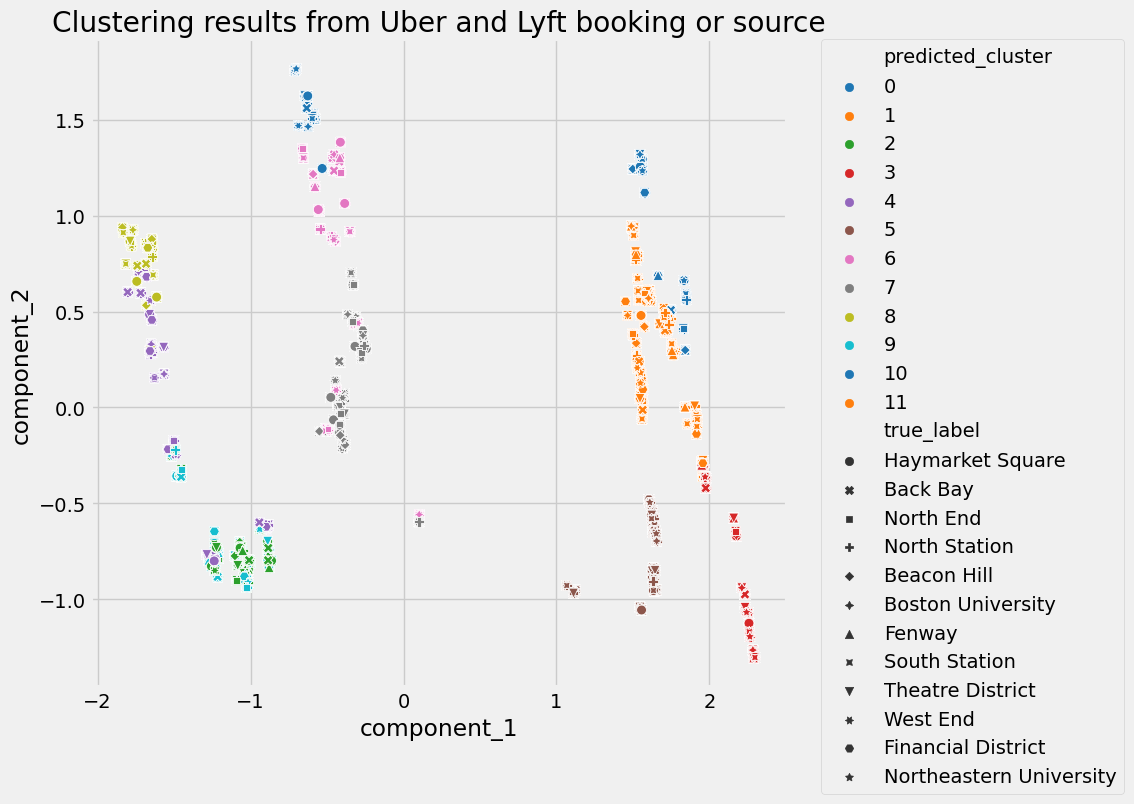

In [30]:
pcadf = pd.DataFrame(pipe["preprocessor"].transform(data),columns=["component_1", "component_2","component_3",
                                                                   "component_4", "component_5","component_6",
                                                                   "component_7", "component_8","component_9",
                                                                   "component_10", "component_11","component_12",
                                                                   "component_13", "component_14","component_15",
                                                                   "component_16", "component_17","component_18",
                                                                   "component_19", "component_20"
                                                                  ])
pcadf["predicted_cluster"] = pipe["clusterer"]["kmeans"].labels_
pcadf["true_label"] = le.inverse_transform(le_class)

plt.style.use("fivethirtyeight")
plt.figure(figsize=(8, 8))
scat = sns.scatterplot("component_1","component_2",s=50,data=pcadf,hue="predicted_cluster",style="true_label",palette="tab10")
scat.set_title("Clustering results from Uber and Lyft booking or source")
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.0)
plt.show()

In [31]:
#pp=[list(predicted_labels)]
new_source=pd.DataFrame(predicted_labels)
new_source.value_counts()

2     72936
1     70621
4     70532
9     67482
7     65375
11    63739
8     52821
5     48175
6     46447
3     33343
0     24106
10    22399
dtype: int64

###### Maximum number of predicted labels are overlapping with ARI score nearing to 0.00035048. The values are not below 0 to -1, which indicates the values are not incorrect. An ARI score of 0 indicates that cluster labels are randomly assigned, and an ARI score of 1 means that the true labels and predicted labels form identical clusters.
###### maximum number of predicted source or booking has been done from North End, Back Bay and Beacon Hill

### Supervised Learning Algorithm to find Prices

In [77]:
df=pd.read_csv('rideshare_kaggle.csv')
df.columns

Index(['id', 'timestamp', 'hour', 'day', 'month', 'datetime', 'timezone',
       'source', 'destination', 'cab_type', 'product_id', 'name', 'price',
       'distance', 'surge_multiplier', 'latitude', 'longitude', 'temperature',
       'apparentTemperature', 'short_summary', 'long_summary',
       'precipIntensity', 'precipProbability', 'humidity', 'windSpeed',
       'windGust', 'windGustTime', 'visibility', 'temperatureHigh',
       'temperatureHighTime', 'temperatureLow', 'temperatureLowTime',
       'apparentTemperatureHigh', 'apparentTemperatureHighTime',
       'apparentTemperatureLow', 'apparentTemperatureLowTime', 'icon',
       'dewPoint', 'pressure', 'windBearing', 'cloudCover', 'uvIndex',
       'visibility.1', 'ozone', 'sunriseTime', 'sunsetTime', 'moonPhase',
       'precipIntensityMax', 'uvIndexTime', 'temperatureMin',
       'temperatureMinTime', 'temperatureMax', 'temperatureMaxTime',
       'apparentTemperatureMin', 'apparentTemperatureMinTime',
       'apparentTemperat

In [78]:
df.shape

(693071, 57)

In [79]:
data_null.shape

(55095, 57)

In [80]:
test_data=data_null.drop(columns=['price'])

#### We will drop some column because we think they are not important to predict prices
* 1) timestamp-- large/small float numbers
* 2) datetime-- all date are from 2018, month and day are alreday segregated
* 3) timezone-- all are from single time zone
* 4) product_id--complex and string values not imp
* 5) 'long_summary','apparentTemperatureHighTime','apparentTemperatureLowTime','apparentTemperatureLowTime','windGustTime','sunriseTime','sunsetTime','uvIndexTime','temperatureMinTime',      'temperatureMaxTime','apparentTemperatureMinTime','temperatureLowTime','apparentTemperatureMaxTime','latitude','longitude'--- no relation on price, domain knoledge
* 6) short_summary and icon ---- both are similiar type dataset, will drop short_summary and keep icon

In [81]:
df['short_summary'].value_counts()

 Overcast             218895
 Mostly Cloudy        146210
 Partly Cloudy        127224
 Clear                 87126
 Light Rain            54912
 Rain                  23712
 Possible Drizzle      18636
 Foggy                  9060
 Drizzle                7296
Name: short_summary, dtype: int64

In [82]:
df['icon'].value_counts()

 cloudy                  218895
 partly-cloudy-night     158030
 partly-cloudy-day       115404
 rain                    104556
 clear-night              60294
 clear-day                26832
 fog                       9060
Name: icon, dtype: int64

In [83]:
df_new=df.drop(columns=['id','timestamp','datetime', 'timezone','long_summary','apparentTemperatureHighTime',
                        'apparentTemperatureLowTime','apparentTemperatureLowTime','windGustTime','sunriseTime',
                        'sunsetTime','uvIndexTime','temperatureMinTime','temperatureMaxTime','apparentTemperatureMinTime',
                        'temperatureLowTime','apparentTemperatureMaxTime','latitude','longitude', 'short_summary','product_id'],axis=1)

In [84]:
df_new.shape

(693071, 37)

##### Now we will check for correlation among different components of temperature and climate with price

In [85]:
df_new.columns

Index(['hour', 'day', 'month', 'source', 'destination', 'cab_type', 'name',
       'price', 'distance', 'surge_multiplier', 'temperature',
       'apparentTemperature', 'precipIntensity', 'precipProbability',
       'humidity', 'windSpeed', 'windGust', 'visibility', 'temperatureHigh',
       'temperatureHighTime', 'temperatureLow', 'apparentTemperatureHigh',
       'apparentTemperatureLow', 'icon', 'dewPoint', 'pressure', 'windBearing',
       'cloudCover', 'uvIndex', 'visibility.1', 'ozone', 'moonPhase',
       'precipIntensityMax', 'temperatureMin', 'temperatureMax',
       'apparentTemperatureMin', 'apparentTemperatureMax'],
      dtype='object')

In [86]:
temp_col=['temperature','apparentTemperature','temperatureHigh','temperatureHighTime',
          'temperatureLow', 'apparentTemperatureHigh','apparentTemperatureLow','temperatureMin',
          'temperatureMax','apparentTemperatureMin', 'apparentTemperatureMax','price']
climate_col=['precipIntensity', 'precipProbability','humidity', 'windSpeed', 'windGust',
             'visibility','dewPoint', 'pressure', 'windBearing','cloudCover', 'uvIndex',
             'visibility.1', 'ozone', 'moonPhase','precipIntensityMax','price']

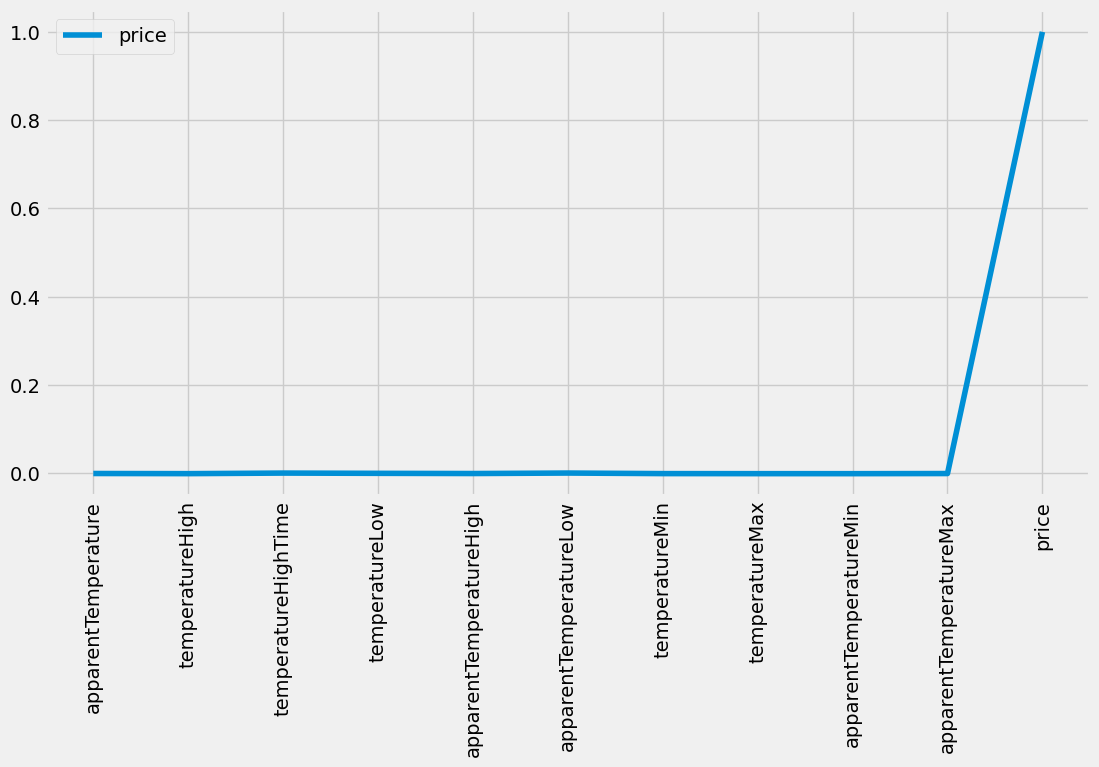

In [87]:
df_temp=df_new[temp_col]
corr_temp=df_temp.corr()[['price']]
price_corr=corr_temp[(corr_temp['price']>0.0001)|(corr_temp['price']<-0.0001)] 
sns.lineplot(data=price_corr)
plt.xticks(rotation=90)
plt.show()

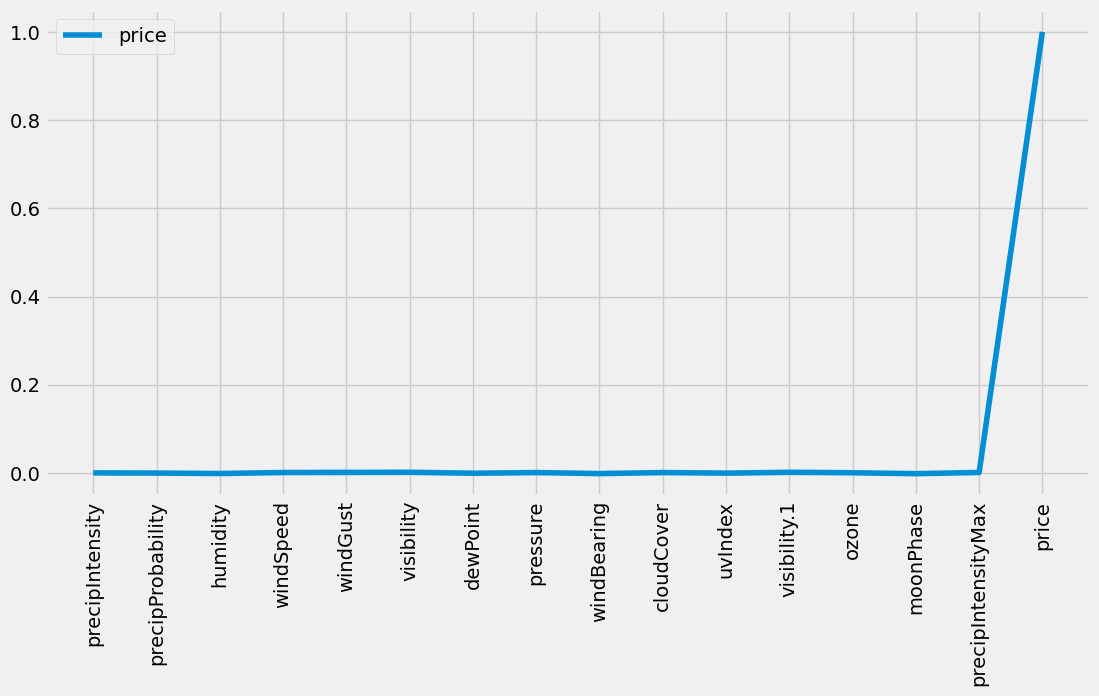

In [88]:
df_climate=df_new[climate_col]
corr_climate=df_climate.corr()[['price']]
price_corr=corr_climate[(corr_climate['price']>0.0001)|(corr_climate['price']<-0.0001)] 
sns.lineplot(data=price_corr)
plt.xticks(rotation=90)
plt.show()

Removing all the features or columns in df_temp and df_climate as the correlation with price is nearly 0. 

In [89]:
temp_col=temp_col[:-1]
climate_col=climate_col[:-1]

In [90]:
df_1=df_new.drop(temp_col,axis=1)
df_2=df_1.drop(climate_col,axis=1)

<AxesSubplot:>

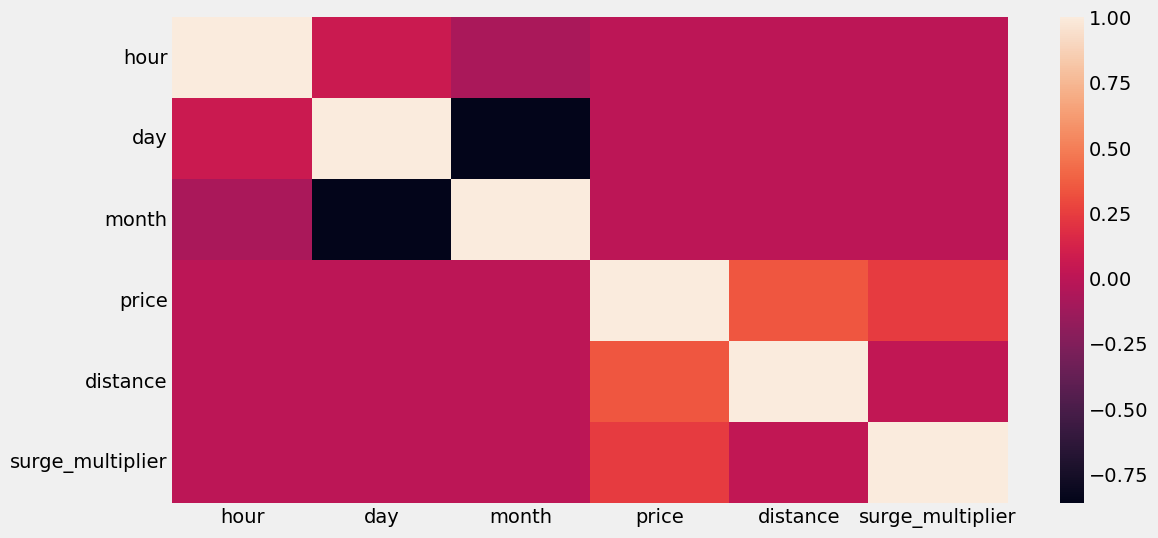

In [91]:
sns.heatmap(df_2.corr())

Better correlation is found on distance and surge_multiplier

In [92]:
df_2['price'].isna().sum()

55095

In [93]:
data_null=df_2.loc[df_2['price'].isna()]
null_ind=data_null.index

In [94]:
data=df_2.drop(index=null_ind)

In [95]:
data.shape

(637976, 11)

In [96]:
X=data.drop(columns=['price'])
y=data['price']

In [97]:
print(X.shape)
print(y.shape)

(637976, 10)
(637976,)


In [98]:
data_null=data_null.drop(columns=['price'],axis=1)
data_null.shape

(55095, 10)

In [99]:
data_null['name'].value_counts()

Taxi    55095
Name: name, dtype: int64

In [100]:
cat_col=[feature for feature in X.columns if X[feature].dtype=='O']
print(f'Categorical column: {cat_col}')

num_col=[feature for feature in X.columns if X[feature].dtype!='O']
print(f'Numerical column: {num_col}')

Categorical column: ['source', 'destination', 'cab_type', 'name', 'icon']
Numerical column: ['hour', 'day', 'month', 'distance', 'surge_multiplier']


In [101]:
from sklearn.model_selection import train_test_split,GridSearchCV

In [102]:
#X=pd.concat([X,data_null],ignore_index=True)

In [103]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.20,random_state=35)

In [104]:
num_pipeline=Pipeline(steps=[('scaling',StandardScaler())])
cat_pipeline=Pipeline(steps=[('encoder',OneHotEncoder())])

In [105]:
preprocessor=ColumnTransformer([('numerical_pipeline',num_pipeline,num_col),
                                ('categorical_pipeline',cat_pipeline,cat_col)])

In [106]:
X_train=preprocessor.fit_transform(X_train)
X_test=preprocessor.transform(X_test)

In [107]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import r2_score

In [66]:
models={
    'LinearRegression':LinearRegression(),
    #'RandomForest': RandomForestRegressor(),
    #'GradientBoosting':GradientBoostingRegressor()
    #'KNN':KNeighborsRegressor()
}

#params={
    #'LinearRegression':{'ridge__alpha':np.logspace(-3,3,10)},
#    'RandomForest':{'n_estimators':[10,100,1000],'max_depth':[15],'random_state':[1]},
#    'GradientBoosting':{'n_estimators':[10,100,1000],'max_depth':[15],'random_state':[1]},
#    'KNN':{'n_neighbors':[13],'metric': ['manhattan'],'weights': ['uniform']}
#}

In [67]:
def evaluate_models(X_train,X_test,y_train,y_test,models):
    report={}
    for i in range(len(list(models))):
        model=list(models.values())[i]
        #param=params[list(models.keys())[i]]
        
        #gs=GridSearchCV(model,param,cv=3)
        #gs.fit(X_train,y_train)
        
        #model.get_params(**gs.best_params_)
        model.fit(X_train,y_train)
        
        y_test_pred=model.predict(X_test)
        score=r2_score(y_test,y_test_pred)
        
        report[list(models.keys())[i]]=score
        
        best_score=max(list(report.values()))
        best_model=list(filter(lambda x: report[x]==best_score,report))[0]
        
        print(f'The Best score of models:{best_model} : {best_score}')
    return report        

In [ ]:
evaluate_models(X_train,X_test,y_train,y_test,models)

In [124]:
re=RandomForestRegressor()

In [ ]:
re.fit(X_train,y_train)
y_pred=re.predict(X_test)

In [ ]:
score=r2_score(y_test,y_pred)
print(score)

In [120]:
le=LinearRegression()

In [121]:
le.fit(X_train,y_train)
y_pred=le.predict(X_test)

In [122]:
y_pred

array([ 5.65726016,  6.25873148, 12.52515779, ...,  8.8805109 ,
       23.89098532,  7.63952465])

In [123]:
score=r2_score(y_test,y_pred)
print(score)

0.9282427053894042
